# CAPSTONE Project Artificial Intelligence - Intellipaat

We want to build a machine learning model on _fashion_mnist_ dataset. We will Create a Classification Deep learning model using Keras/Tensorflow framework, but before that we will start with a **simple feeward neural network**, then we will move on a **convolutional neural network** that will be our base model, and finally we will build our **final convolutional neural network model**.

Instead of downloading data from https://github.com/zalandoresearch/fashion-mnist , we will use the one integrated into keras.datasets package. Just to precise that fashion_mnist dataset is compose of _training_ and _test_ dataset of images in greyscale color. Each picture is 28 x 28 shape [pixels]. Training dataset has 60 000 images (60 000 * 28 * 28 shape) and test dataset has 10 000 images (10 000 * 28 * 28 shape). The data is labelised.

The **Goal** is to build a model that can help us classify any images among the 10 identified classes. 

What we will use:
-1. Convolutional Neural Network
-2. Visualisation of the Error/Accuracy with Tensorboard.
-3. Model saving and best weights saving.
-4. Calculation of the accuracy on Test dataset.

In [ ]:
# Load the tensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir 

## Simple Neural Network

In [ ]:
# we import tensorflow
import tensorflow as tf

In [ ]:
# we import the dataset fashion_mnist module
from keras.datasets import fashion_mnist

In [ ]:
# we load the dataset and make sure he has the rigth shape
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=y_train, columns=['class']))
# we can notice that label is evenly distributed in train and test data
# in that case we can use accuracy or F1 as metrics for learning apreciation

In [ ]:
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=y_test, columns=['class']))
# we can notice that labels is evenly distributed in test data

In [ ]:
# display the 157th image

digit = x_train[157] # take the 157th image
import matplotlib.pyplot as plt # import the matplotlib package
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# plot 25 first image of the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  # define the heigth and weigth of whole picture
for i in range(25):          # across the each of the 25 first images
    plt.subplot(5,5,i+1)     # plot that image with 5 * 5 dimensions
    #plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Prepare the image data
x_train = x_train.reshape((60000, 28 * 28)) # reshape data in the shape fitting the network
x_train = x_train.astype('float32') / 255   # scaling the data between 0 - 1

x_test = x_test.reshape((10000, 28 * 28)) # reshape data in the shape fitting the network
x_test = x_test.astype('float32') / 255   # scaling the data between 0 - 1

# Preparing the labels

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # categorise the label that is number initialy
y_test = to_categorical(y_test, 10)   # categorise the label that is number initialy

In [ ]:
# the architercture network
from keras import models  # import models from keras
from keras import layers  # import layers from keras

# ANN model
network = models.Sequential() # sequential model
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # first layer (input one) with relu activation function and 512 output point
network.add(layers.Dense(10, activation='softmax')) # last and output layer with softmax function activation and 10 output that corresponds to 10 labels

# compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', # cost function is categorical crossentropy
                metrics=['accuracy'])            # metric use to improve learning is accuracy

In [ ]:
# fit the model 
network.fit(x_train, y_train, epochs=5, batch_size=128)

# evaluate
test_loss, test_acc = network.evaluate(x_test, y_test) # use the model on test data

print('test_acc:', test_acc)  # print the accuracy on test data

In [ ]:
network.save('C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/fashion_mnist_1.h5') # save the model

## Base Convolutional Neural Network

In [ ]:
# we import tensorflow
import tensorflow

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

In [ ]:
# load the dataset module
from keras.datasets import fashion_mnist

In [ ]:
# as previously, load the dataset and check shape
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=y_train, columns=['class']))
# we can notice that label is evenly distributed in train and test data
# in that case we can use accuracy  as metrics for learning apreciation

In [ ]:
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=y_test, columns=['class']))
# we can notice that label is evenly distributed in train and test data
# in that case we can use accuracy  as metrics for learning apreciation

In [ ]:
# reshape data in the shape fitting the network, here we end with a tensor of 4D
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# we categorise label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# use of ImageDataGenerator to preprocess the image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255, # scaling the data btw 0-1
    validation_split=0.25) # split data in training .75 and validation part .25

# Convolutionnal model from scratch
model = models.Sequential() # sequential model
model.add(layers.Conv2D(filters=32, kernel_size =(3, 3), activation='relu', input_shape = (28, 28, 1))) # input layer, convolutionnal, with 32 filters of size 3 * 3
model.add(layers.MaxPooling2D((2, 2))) # max pool layer
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # convolutionnal with 64 filter and 3 * 3 size' filter
model.add(layers.MaxPooling2D((2, 2)))  # maxpooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# add classifier on top
model.add(layers.Flatten())    # flatten layer
model.add(layers.Dense(64, activation='relu')) # dense layer with relu activation
model.add(layers.Dense(10, activation='softmax')) # output layer with softmax function and 10 outputs (labels)

In [ ]:
model.summary() # get the summary of the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fitting the model using batch generator
history = model.fit(
    datagen.flow(x_train, y_train, subset='training', batch_size = 60),
    steps_per_epoch=750,
    epochs=15,
    validation_data=datagen.flow(x_train, y_train, subset= 'validation', batch_size=40),
    validation_steps=375)

In [ ]:
# evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_acc)

# save the model
model.save('C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/fashion_mnist_2.h5')

In [ ]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##  Convolutional Neural Network with improved parameters

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.datasets import fashion_mnist
from keras.optimizers import SGD
import visualkeras
from keras.preprocessing.image import ImageDataGenerator
# from plot_model import plot_model
from numpy import mean
from numpy import std
from sklearn import model_selection
from matplotlib import pyplot as plt
# import py_dot
# import graphviz
# import pydot
# import graphviz

In [14]:
# load the TensorBoard notebook extension
%load_ext tensorboard

In [15]:
# import tensorflow and datetime
import tensorflow as tf
import datetime

In [16]:
# set the log directory
log_folder = 'C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs'

In [17]:
# clear all logs
!rm -rf log_folder

In [18]:
# create timestamp file  
import os
#log_dir = os.path.join(log_folder, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
log_dir =log_folder + '/fit'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [19]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# summarise loaded dataset
print('Train: X:%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X:%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X:(60000, 28, 28), y=(60000,)
Test: X:(10000, 28, 28), y=(10000,)


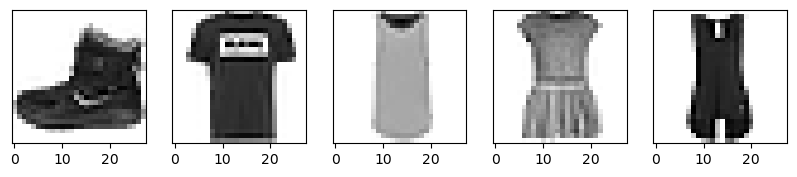

In [20]:
import matplotlib.pyplot as plt

# plot few images
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    #plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=train_labels, columns=['class']))
# we can notice that label is evenly distributed in train and test data

In [ ]:
import seaborn as sn
sn.countplot(x='class', data = pd.DataFrame(data=test_labels, columns=['class']))
# we can notice that label is evenly distributed in train and test data

In [ ]:
# we can notice that label is evenly distributed in train and test data
# in that case we can use accuracy  as metrics for learning apreciation
# this is a crucial step in classification problem, identify the metric

In [21]:
# define load and preprocess function
def load_format_dataset():
    # load data set
    (train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
    # reshape the data 
    train_X = train_X.reshape(train_X.shape[0], 28, 28, 1) # train_X[0] is the number of training sample
    test_X  = test_X.reshape(test_X.shape[0], 28, 28, 1)   # test_y[0] is the number of test sample
    # one hot encoding of targer=t values (10)
    train_y = to_categorical(train_y)
    test_y = to_categorical(test_y)
    # return train data and test data in the rigth format
    return train_X, train_y, test_X, test_y

# scale images    
def preprocess_images(train_X, test_X):
    # convert from intergers to float
    train_nom = train_X.astype('float32')
    test_nom  = test_X.astype('float32')
    # normalise range 0 - 1
    train_nom = train_nom * 1. / 255.
    test_nom = test_nom * 1. / 255.
    # return normalised images
    return train_nom, test_nom

# define the model
def specify_model():
    model = models.Sequential()
    # 1st layer input : 2D convolutional with kernel size as 3*3 and Max pooling operation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    # 2nd layer hidden: 2D convolutionnal with kernel size 3*3 Relu activation  and max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2)) # this will "delete" 25 % of result of previous layers, the goal is to regularise learnnig process
    # 3rd layer hidden: 2D convolutionnal with kernel size 3*3 Relu activation  and max pooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    # Fully connected layer with Relu activation 
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.02))
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
    # output layer
    model.add(layers.Dense(10, activation='softmax'))
    # compile
    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9), # we change the optimizer of previous model
        loss='categorical_crossentropy', 
        metrics=['accuracy'])
    
    return model

In [22]:
# define the cross validation approach Kfold

def cross_validation(data_X, data_y, n_folds=5):
    scores, histories = list(), list()
    # initiate the kfold class from model_selection module
    kfold = model_selection.KFold(n_folds, shuffle = True, random_state=1987)
    # enumarate splits
    for trn_, val_ in kfold.split(X=data_X):
        # instantiate the model
        convnet = specify_model()
        # select row for train and validation
        train_X, train_y, val_X, val_y = data_X[trn_], data_y[trn_], data_X[val_], data_y[val_]
        # details records
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)
        # checkpoint
        filepath="C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit/weights.best.hdf5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
        # early stopping
        es = EarlyStopping(monitor='val_accuracy', patience=5, mode ='auto')
        # fit the model
        history = convnet.fit(train_X, train_y, epochs = 10, batch_size = 32, validation_data = (val_X, val_y),
                              callbacks=[tensorboard_callback, checkpoint, es], verbose =0 )
        # evaluate model
        _, acc = convnet.evaluate(val_X, val_y)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return  scores, histories, convnet

In [23]:
# plot curves
def summarise_learning(histories):
    
    for i in range(len(histories)):
        epochs = range(1, len(histories[i].history['accuracy']) + 1)
        # plot accuracy
        plt.subplot(111)
        plt.plot(histories[i].history['accuracy'], 'bo', label='Training acc')
        plt.plot( histories[i].history['val_accuracy'], 'g', label='Validation acc')
        plt.title('Training and validation classification accuracy')
        plt.legend()
        # plot loss 
        plt.subplot(222)
        plt.plot( histories[i].history['loss'], 'bo', label='Training loss')
        plt.plot( histories[i].history['val_loss'], 'g', label='Validation loss')
        plt.title('Training and validation Cross Entropy loss')
        plt.legend()
    plt.show()

In [24]:
# summarising performance
def summarise_performance (scores):
    # print summary
    print('Accuracy: mean =%.3f, std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box plot
    plt.boxplot(scores)
    plt.show()

In [25]:
# load data set
trainX, trainY, testX, testY = load_format_dataset()
# prepare images
trainX, testX = preprocess_images(trainX, testX)
# evaluate
scores, histories, convnet_fmnist = cross_validation(trainX, trainY)   


Epoch 1: val_accuracy improved from -inf to 0.86917, saving model to C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit\weights.best.hdf5

Epoch 2: val_accuracy improved from 0.86917 to 0.89025, saving model to C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit\weights.best.hdf5

Epoch 3: val_accuracy improved from 0.89025 to 0.89283, saving model to C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit\weights.best.hdf5

Epoch 4: val_accuracy improved from 0.89283 to 0.90250, saving model to C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit\weights.best.hdf5

Epoch 5: val_accuracy did not improve from 0.90250

Epoch 6: val_accuracy improved from 0.90250 to 0.91492, saving model to C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit\weights.best.hdf5

Epoch 7: val_accuracy did not improve from 0.91492

Epoch 8: val_accuracy improved from 0.91492 to 0.91600, saving model to C:/Users/bo

C:\Users\bomyr\AppData\Local\Temp\ipykernel_64496\4029168780.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)
C:\Users\bomyr\AppData\Local\Temp\ipykernel_64496\4029168780.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


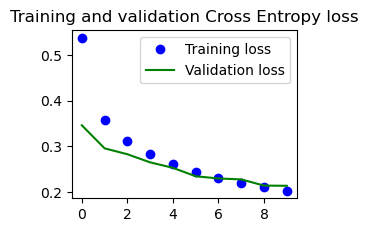

Accuracy: mean =91.943, std=0.316, n=5


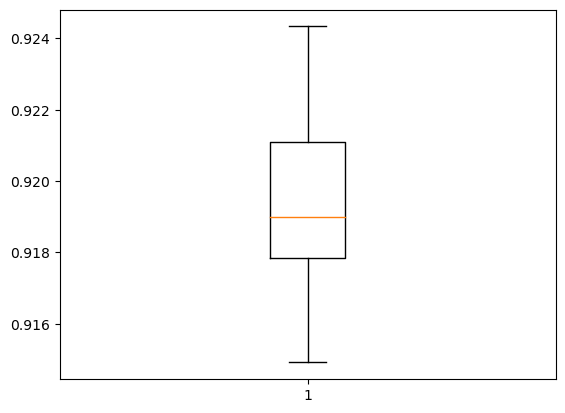

In [26]:
# learning curves
summarise_learning(histories)
# summarise perform
summarise_performance(scores)

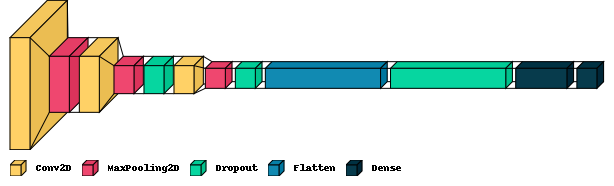

In [43]:
# view model
visualkeras.layered_view(convnet_fmnist, legend = True, 
                         to_file='C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/output.png')

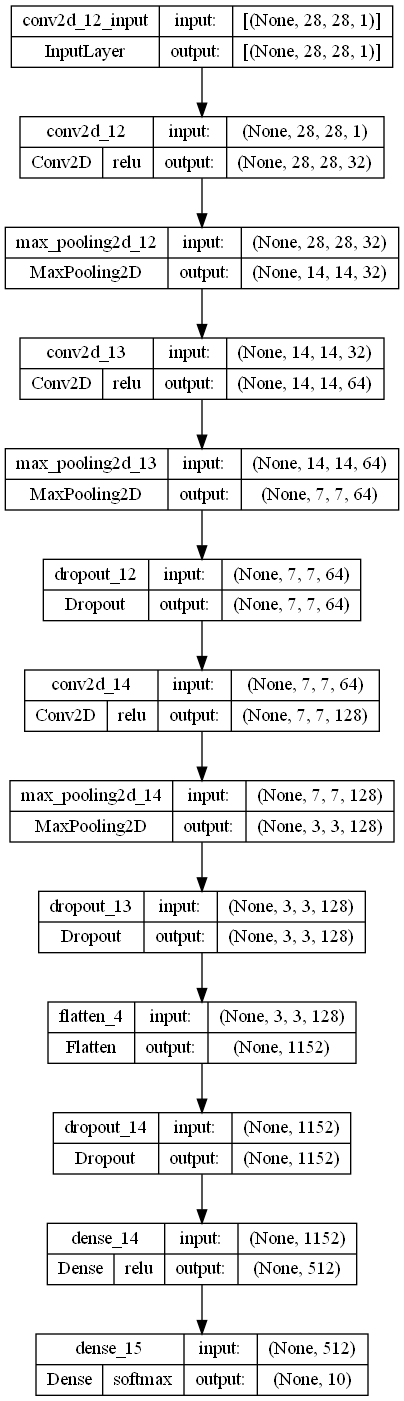

In [29]:
# save image model
tf.keras.utils.plot_model(convnet_fmnist, to_file='C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/model_f.png',
                          show_shapes=True, show_layer_activations=True)

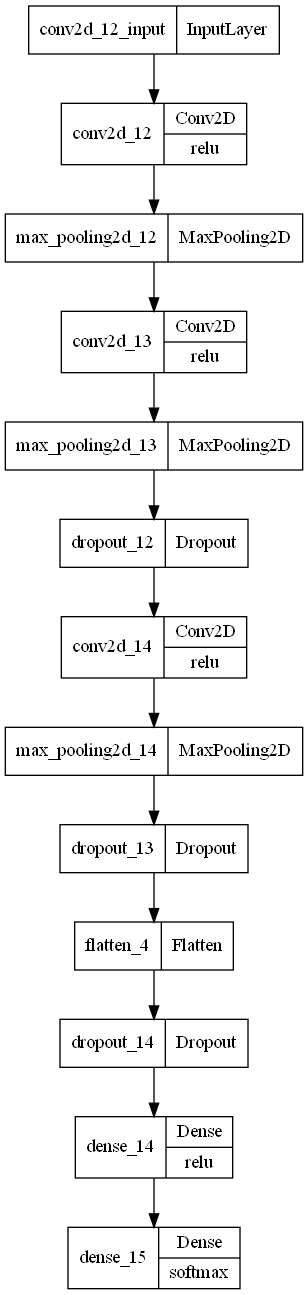

In [31]:
# save image model
tf.keras.utils.plot_model(convnet_fmnist, to_file='C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/model_f_2.png',
                          show_layer_activations=True)

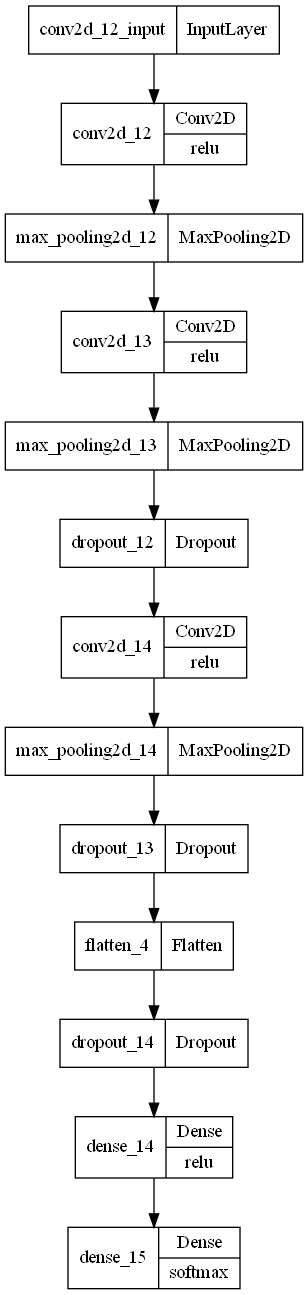

In [32]:
# save image model
tf.keras.utils.plot_model(convnet_fmnist, to_file='C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/model_f_3.png',
                          expand_nested=True, show_layer_activations=True)

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(convnet_fmnist, view=True, filename="C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/model_fmnist",
        title="CNN — Model — Final Architecture")

In [51]:
# save the model
convnet_fmnist.save('C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/fashion_minst_best.h5')

In [52]:
tensorboard --inspect --logdir log_dir

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
Processing event files... (this can take a few minutes)

No event files found within logdir log_dir

In [53]:
%tensorboard --logdir 'C:/Users/bomyr/Downloads/Master DSA/Deep Learning/projectintel/logs/fit20230416-200338'

In [54]:
test_loss, test_acc = convnet_fmnist.evaluate(testX,  testY, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2371 - accuracy: 0.9144 - 3s/epoch - 10ms/step

Test accuracy: 0.9143999814987183


In [ ]:
#add a softmax layer to have probability results
probability_model = tf.keras.Sequential([convnet,tf.keras.layers.Softmax()])